<a href="https://colab.research.google.com/github/MarinaChau/IASD_classes/blob/master/OML/OMLProject_MarinaCHAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Second-order optimization methods

In [ ]:
# Preamble: useful toolboxes, librairies, functions, etc.

# Display
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt # Square root

# NumPy - Matrix and vector structures
import numpy as np # NumPy library
from numpy.random import multivariate_normal, randn, uniform # Probability distributions

# SciPy - Efficient mathematical calculation
from scipy.linalg import norm # Euclidean norm
from scipy.linalg.special_matrices import toeplitz # Toeplitz matrices
from scipy.linalg import svdvals # Singular value decomposition
from scipy.optimize import check_grad # Check derivatives
from scipy.optimize import fmin_l_bfgs_b # Efficient method for minimization

#Compteur de comparaison
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0

## 1.1 Newton's method

### Implementation 1.1

In [ ]:
def newton_method(w0, function_f, gradient_f, hessian_f, n_iter, eps = 0.0001):
    """
        A code for  Newton's method in its basic form

        Inputs:
            w0: Initial vector
            function_f: Objective function
            gradient_f: Gradient of the objective function
            hessian_f: hessian matrix of the objective function
            n_iter: Number of iterations
            eps: convergence stop

        Outputs:
            w_output: Final iterate of the method
    """

        ############
    # Initialize iteration counter
    k=1
    ####################
    # Main loop
    w = w0 - np.dot(np.linalg.inv(hessian_f(w0)), gradient_f(w0))
    while (np.linalg.norm(gradient_f(w), 2) > eps and k < n_iter):
        
        # Select the stepsize and perform the update
        w = w - np.dot(np.linalg.inv(hessian_f(w)), gradient_f(w))
        
        # Increment the iteration count
        k += 1
        
    
    # End main loop
    ######################
    # Output
    print(w)
    w_output = w.copy()
    return w_output, k


### Question 1.1 

a) 

minimize  $  w∈R^3 q(w) := 2(w1 + w2 + w3 − 3)^2 + (w1 − w2)^2 + (w2 − w3)^2 $

We have: $\nabla f (w) = 
\begin{bmatrix}
          6w_1 + 2w_2 + 4w_3 -12 \\
          2w_1 + 8w_2 + 2w_3 -12\\     
          4w_1 + 2w_2 + 6w_3 -12
\end{bmatrix}$
and the hessian $\nabla^2f(w) = \begin{bmatrix}
          6 & 2 & 4\\
          2 & 8 & 2\\
          4 & 2 & 6
\end{bmatrix}$

After inverting the hessian:
$\nabla^2f(w)^{-1} = \begin{bmatrix}
          \frac{11}{36} & -\frac{1}{36} & -\frac{7}{36}\\
          -\frac{1}{36} & \frac{5}{36} & -\frac{1}{36}\\
          -\frac{7}{36} & -\frac{1}{36} & \frac{11}{36}
\end{bmatrix}$

So at step 1: with $ w_0 = \begin{bmatrix}
          0\\
          0\\
          0
\end{bmatrix}$

We get,

$w_1 = w_0 − [\nabla^2 f (w_0)]^{-1} \nabla f (w_0) = -\begin{bmatrix}
          \frac{11}{36} & -\frac{1}{36} & -\frac{7}{36}\\
          -\frac{1}{36} & \frac{5}{36} & -\frac{1}{36}\\
          -\frac{7}{36} & -\frac{1}{36} & \frac{11}{36}
\end{bmatrix}  \begin{bmatrix}
           -12 \\
           -12\\     
           -12
\end{bmatrix}$ =$\begin{bmatrix}
           1 \\
           1 \\     
           1
\end{bmatrix}$


Thus, after one iteration, it converges to the solution with Newton's method. 



b)

In [ ]:
def newton_method(fonc, w_0, w_star, eps, max_iter=1000):
  """
  A code to compute Newton's method.
  """
  w_k = w_0
  val = fonc()
  delta = 1
  D = []
  k=0
  while (delta > eps and k < max_iter):
    k+=1
    w_k = newton_iteration(val.grad(w_k), val.hess(w_k), w_k)
    delta = np.linalg.norm(w_k - w_star)
    D.append(delta)
  return w_k, D

def newton_iteration(grad, second_grad, w_k):
  inv_sec_grad = np.linalg.inv(second_grad)
  w = w_k - np.dot(inv_sec_grad, grad)
  return w

In [ ]:
class quadratic_func :
  def q(self, w):
      return 2*(w[0]+w[1]+w[2]-3)**2+(w[0]-w[1])**2+(w[1]-w[2])**2

  def grad(self, w):
      grad = np.zeros(3)
      grad[0]=6*w[0]+2*w[1]+4*w[2]-12
      grad[1]=2*w[0]+8*w[1]+2*w[2]-12
      grad[2]=4*w[0]+2*w[1]+6*w[2]-12
      return grad

  def hess(self, w):
      res = np.array([[6,2,4],
                    [2,8,2],
                    [4,2,6]])
      return res


In [ ]:
# Different starting points
w_origin = np.array([0, 0, 0])
w_1 = np.array([1, 1, 1])
w_2 = np.array([1, 0, 0])
n_iter= 1000

In [ ]:
w_0_origin = np.zeros(3) # origin point
w_0_1 = np.array([100,-0.1, -11])
w_0_2 = np.array([-100,-200, -50])

sol, D = newton_method(quadratic_func, w_0_origin, np.ones(3), 0.0001)
print(D)
sol, D = newton_method(quadratic_func, w_0_1, np.ones(3), 0.0001)
print(D)
sol, D = newton_method(quadratic_func, w_0_2, np.ones(3), 0.0001)
print(D)
#Pour un précision de 10e-4 l'algorithme n'a eu besoin d'une seul itération pour converger peu importe le point de départ


[6.280369834735101e-16]
[5.872156290738386e-14]
[6.961868572213853e-14]


With Newton's method and for one iteration we got an accuracy around 10e-4.

We thus observe a convergence with the 1st iteration.


### Question 1.2

*a*) Rosenbrock function

In [ ]:
class Rosenbrock:
  def q(self, w):
      return 100*(w[1]-w[0]**2)**2+(1-w[0])**2

  def grad(self, w):
      return np.array((400 * w[0]**3 - 400 * w[0] * w[1] + 2* w[0] - 2, 200 * (w[1] - w[0]**2)))

  def hess(self, w):
      return np.array([(1200* w[0] ** 2 - 400* w[1] + 2, -400 * w[0]), [-400 * w[0], 200]])



In [ ]:
w_0_origin = np.zeros(2)
sol , D = newton_method(Rosenbrock, w_0_origin, np.ones(2), 1e-4)
print(D)

w_01 = np.array([-1.2,1])
w_02 = np.array([0, 1/200 + 10e-6])
w_03 = np.array([0, 0.000005])

sol , D = newton_method(Rosenbrock, w_01, np.ones(2), 0.001)
print(D)




[1.0, 2.220446049250313e-16]
[2.208338697540568, 4.1817487074851885, 0.4795838662545383, 0.0559726763430513, 9.624794643081259e-06]


In [ ]:
sol , D = newton_method(Rosenbrock, w_02, np.ones(2), 0.001)
print(sol, D)


[1.00000359 1.00000718] [501.0009980029975, 249999.49198350386, 251000.9935519797, 8.032033795640916e-06]


In [ ]:

sol , D = newton_method(Rosenbrock, w_03, np.ones(2), 0.001)
print(sol, D)


[1.         0.99999901] [1.0000005010013764, 0.0022280799447062754, 9.92067517259189e-07]


a) It converges in both case, save when the second term of W02 is equals to 1/200 + 10e-12. Indeed, in that case the hessian can not be inverted. I changed it to 1/200 + 10e-6.

b) We can see that w02 and w03 are similar, with different noise. Both got the same local optimum, thus illustrating Newton's method local in nature.

## 1.2 A globally convergent version of Newton's method

### Implementation 1.2 

In [ ]:
def get_lambda(A):
  lambda_min = np.linalg.eigvals(A)[0]
  lambda_k = 2*max(0.001, -lambda_min)         #Ne marche pas avec 0.
  return lambda_k


def get_alpha_Armijo(teta, f, w, c, d):   
  i = 1
  alpha = teta 
  while (f.q(w+alpha*d) >= f.q(w)+c*alpha*np.dot(d, f.grad(w))):    #f.grad déja calcul aurait pu être évité, répétition pas pris en compte pour 1.5
    i += 1
    alpha = teta ** i
  return teta ** (i-1) 


def Newton_like_ite(f, grad, second_grad, w_k , c, teta):
  Lambda = get_lambda(second_grad)
  inv = np.linalg.inv((second_grad + Lambda * np.eye(second_grad.shape[0])))
  d = - np.dot(inv, grad)
  alpha = get_alpha_Armijo(teta, f, w_k, c, d)
  w = w_k + alpha * d

  global Fonc_Newton
  global Grad_Newton
  Fonc_Newton += 2
  Grad_Newton += 1
  return w

def Newton_like(fonc, w_0, w_star, c, teta, eps):
  w_k = w_0
  val = fonc()
  delta = 1
  D = []
  n_iter = 0
  while (delta > eps):
    w_k = Newton_like_ite(val, val.grad(w_k), val.hess(w_k) ,w_k ,c ,teta)
    delta = np.linalg.norm(w_k - w_star)
    D.append(delta)
    global Ite_Newton
    Ite_Newton += 1
    n_iter += 1
    #print(delta)
  return w_k, D, n_iter


### Question 1.3 

In [ ]:
w_01 = np.array([-1.2,1.1])
w_02 = np.array([0, 1/200 + 10e-12])


In [ ]:
# with w01
sol1 , D1, n_iter = Newton_like(Rosenbrock, w_01, np.ones(2),  0.0001, 0.5, 0.001)
print(f"w* : {sol}, \n and delta between (wk - w*): {D}")
n_iter

w* : [0.99991025 0.99955805], 
 and delta between (wk - w*): [1.1188766410939974, 0.9028599480740718, 0.5685309918297299, 0.48053418695860045, 0.08545973641922291, 0.03617046517209554, 0.0004509693486329913]


14

In [ ]:
sol2 , D2, n_iter = Newton_like(Rosenbrock, w_02, np.ones(2),  0.0001, 0.5, 0.001)
print(f"w* : {sol}, \n and delta between (wk - w*): {D}")

w* : [0.99991025 0.99955805], 
 and delta between (wk - w*): [1.1188766410939974, 0.9028599480740718, 0.5685309918297299, 0.48053418695860045, 0.08545973641922291, 0.03617046517209554, 0.0004509693486329913]


In [ ]:
# Plot convergence for w01 and w02
D2 = D2 + [0] * 7

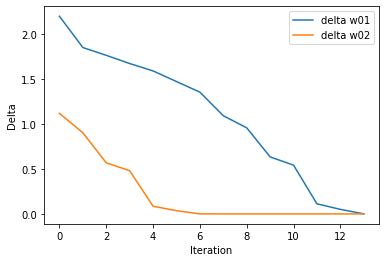

In [ ]:
x = np.arange(0, 14)
plt.plot(x, D1, label="delta w01")
plt.plot(x, D2, label="delta w02")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Delta")
plt.show()

This method is more robust than Newton's method. We can for example calculate w02 without any errors. Both of them converge towards zero. However, we are slower with the second method in term of convergence rate than with Newton's for w01. 

### Question 1.4

In [ ]:
# Compute sol and D for different values of theta and c.

c = np.arange(0.01, 0.5, 0.02)
theta = np.arange(0.01, 0.99999, 0.04)
n = np.zeros((c.shape[0], theta.shape[0]))

for i in range(c.shape[0]):
    for j in range(theta.shape[0]):
        sol1 , D1, n_iter1 = Newton_like(Rosenbrock, w_01, np.ones(2),  c[i], theta[j], 0.001)
        sol2 , D2, n_iter2 = Newton_like(Rosenbrock, w_02, np.ones(2),  c[i], theta[j], 0.001)
        n[i,j] = np.mean([n_iter1, n_iter2])
        #n.append(np.mean([n1,n2]))
n = np.array(n)    


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0, 'z')

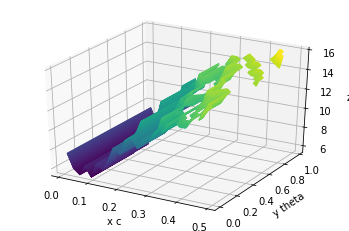

In [ ]:
from mpl_toolkits import mplot3d


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(c, theta)
ax.contour3D(X, Y, n, 500)
ax.set_xlabel('x c')
ax.set_ylabel('y theta')
ax.set_zlabel('z')


We can see that for high values of theta it converges faster, it isn't clear for c what's the best value. However, we can notice that for a fixed theta, the method is less sensitive to variation of c. 


## 1.3 Quasi Newton methods and BFGS

### Implementation 1.3

In [ ]:
def BFGS_ite(f, grad, H, w_k, c, teta):
    d = - np.dot(H, grad)
    alpha = get_alpha_Armijo(teta, f, w_k, c, d)
    #print(alpha)
    w = w_k -  alpha*np.dot(H, grad)
    s_k = w - w_k
    v_k = f.grad(w) - grad
    global Grad_BFGS 
    global Fonc_BFGS 
    Grad_BFGS += 2
    Fonc_BFGS += 2
    
    if np.dot(s_k, v_k)>0:
      v_k = v_k.reshape((w_k.shape[0],1))
      s_k = s_k.reshape((1,w_k.shape[0]))
      l = np.eye(grad.shape[0])- (np.matmul(v_k,s_k))/np.dot(s_k, v_k)[0,0]
      H = l.T @ H @ l + (s_k.T @ s_k)/np.dot(s_k, v_k)[0,0]
    return w, H

def BFGS(fonc, w_0, w_star, eps, c, teta):
    w_k = w_0
    val = fonc()
    delta = 1 
    D = []
    H = np.eye(w_0.shape[0])
    while (delta > eps):
      w_k, H = BFGS_ite(val, val.grad(w_k), H ,w_k ,c ,teta)
      global Ite_BFGS
      Ite_BFGS += 1
      
      delta = np.linalg.norm(w_k - w_star)
      D.append(delta)
    return w_k, D
    


### Question 1.5

In [ ]:
w_0_origin = np.zeros(2)
sol , D = BFGS(Rosenbrock, w_0_origin, np.ones(2), 0.001, 0.0001, 0.5)
print(sol)

w_0_1 = np.array([-1.2,1])
w_0_2 = np.array([0, 1/200 + 10e-12])
sol , D = BFGS(Rosenbrock, w_0_1, np.ones(2), 0.001, 0.0001, 0.5)
print(sol)



[1.00032849 1.000671  ]
[0.99999939 0.99993621]


In [ ]:
# BFGS - QuasiNewton -> Rosenrock
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0

print("Comparison of Quasi-Newton and BFGS on Rosenbrock \n")

w_0_origin = np.zeros(2)
sol , D = BFGS(Rosenbrock, w_0_origin, np.ones(2), 0.001, 0.0001, 0.5)
print("BFGS -> initialisation :", w_0_origin, " results: Ite:", Ite_BFGS, ", Fonction Eval:", Fonc_BFGS, ", grad eval :", Grad_BFGS )
sol , D, n_iter = Newton_like(Rosenbrock, w_0_origin, np.ones(2),  0.0001, 0.5, 0.001)
print("Newton -> initialisation :", w_0_origin, " results: Ite:", Ite_Newton, ", Fonction Eval:", Fonc_Newton, ", grad eval :", Grad_Newton, ", Hess eval:", 2*Grad_Newton  )

print("\n")
w_0_1 = np.array([-1.2,1])
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0
sol , D = BFGS(Rosenbrock, w_0_1, np.ones(2), 0.001, 0.0001, 0.5)
print("BFGS -> initialisation :", w_0_1, " results: Ite:", Ite_BFGS, ", Fonction Eval:", Fonc_BFGS, ", grad eval :", Grad_BFGS )
sol , D, n_iter = Newton_like(Rosenbrock, w_0_1, np.ones(2),  0.0001, 0.5, 0.001)
print("Newton -> initialisation :", w_0_1, " results: Ite:", Ite_Newton, ", Fonction Eval:", Fonc_Newton, ", grad eval :", Grad_Newton, ", Hess eval:", 2*Grad_Newton  )


w_0_2 = np.array([0, 1/200 + 10e-12])
print("\n")
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0
sol , D = BFGS(Rosenbrock, w_0_2, np.ones(2), 0.001, 0.0001, 0.5)
print("BFGS -> initialisation :", w_0_2, " results: Ite:", Ite_BFGS, ", Fonction Eval:", Fonc_BFGS, ", grad eval :", Grad_BFGS )
sol , D, n_iter = Newton_like(Rosenbrock, w_0_2, np.ones(2),  0.0001, 0.5, 0.001)
print("Newton -> initialisation :", w_0_2, " results: Ite:", Ite_Newton, ", Fonction Eval:", Fonc_Newton, ", grad eval :", Grad_Newton, ", Hess eval:", 2*Grad_Newton  )

Comparison of Quasi-Newton and BFGS on Rosenbrock 

BFGS -> initialisation : [0. 0.]  results: Ite: 51 , Fonction Eval: 102 , grad eval : 102
Newton -> initialisation : [0. 0.]  results: Ite: 7 , Fonction Eval: 14 , grad eval : 7 , Hess eval: 14


BFGS -> initialisation : [-1.2  1. ]  results: Ite: 48 , Fonction Eval: 96 , grad eval : 96
Newton -> initialisation : [-1.2  1. ]  results: Ite: 14 , Fonction Eval: 28 , grad eval : 14 , Hess eval: 28


BFGS -> initialisation : [0.    0.005]  results: Ite: 32 , Fonction Eval: 64 , grad eval : 64
Newton -> initialisation : [0.    0.005]  results: Ite: 7 , Fonction Eval: 14 , grad eval : 7 , Hess eval: 14


In [ ]:
# BFGS - QuasiNewton -> q
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0

print("Comparaison of Quasi-Newton and BFGS on q \n")

w_0_origin = np.zeros(3)
sol , D = BFGS(quadratic_func, w_0_origin, np.ones(3), 0.001, 0.0001, 0.5)
print("BFGS -> initialisation :", w_0_origin, " résultat: Ite:", Ite_BFGS, ", Fonction Eval:", Fonc_BFGS, ", grad eval :", Grad_BFGS )
sol , D, _= Newton_like(quadratic_func, w_0_origin, np.ones(3),  0.0001, 0.5, 0.001)
print("Newton -> initialisation :", w_0_origin, " résultat: Ite:", Ite_Newton, ", Fonction Eval:", Fonc_Newton, ", grad eval :", Grad_Newton, ", Hess eval:", 3*Grad_Newton  )

print("\n")
w_0_1 = np.array([100, -0.1, -11])
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0
sol , D = BFGS(quadratic_func, w_0_1, np.ones(3), 0.001, 0.0001, 0.5)
print("BFGS -> initialisation :", w_0_1, " result: Ite:", Ite_BFGS, ", func Eval:", Fonc_BFGS, ", grad eval :", Grad_BFGS )
sol , D, _ = Newton_like(quadratic_func, w_0_1, np.ones(3),  0.0001, 0.5, 0.001)
print("Newton -> initialisation :", w_0_1, " result: Ite:", Ite_Newton, ", func Eval:", Fonc_Newton, ", grad eval :", Grad_Newton, ", Hess eval:", 3*Grad_Newton  )


w_0_2 = np.array([-100,-200, -50])
print("\n")
Ite_BFGS = 0 
Fonc_BFGS = 0
Grad_BFGS = 0
Ite_Newton = 0 
Fonc_Newton = 0
Grad_Newton = 0
sol , D = BFGS(quadratic_func, w_0_2, np.ones(3), 0.001, 0.0001, 0.5)
print("BFGS -> initialisation :", w_0_2, " result: Ite:", Ite_BFGS, ", Fonction Eval:", Fonc_BFGS, ", grad eval :", Grad_BFGS )
sol , D, _ = Newton_like(quadratic_func, w_0_2, np.ones(3),  0.0001, 0.5, 0.001)
print("Newton -> initialisation :", w_0_2, " result: Ite:", Ite_Newton, ", Fonction Eval:", Fonc_Newton, ", grad eval :", Grad_Newton, ", Hess eval:", 3*Grad_Newton  )

Comparaison of Quasi-Newton and BFGS on q 

BFGS -> initialisation : [0. 0. 0.]  résultat: Ite: 2 , Fonction Eval: 4 , grad eval : 4
Newton -> initialisation : [0. 0. 0.]  résultat: Ite: 1 , Fonction Eval: 2 , grad eval : 1 , Hess eval: 3


BFGS -> initialisation : [100.   -0.1 -11. ]  result: Ite: 8 , func Eval: 16 , grad eval : 16
Newton -> initialisation : [100.   -0.1 -11. ]  result: Ite: 2 , func Eval: 4 , grad eval : 2 , Hess eval: 6


BFGS -> initialisation : [-100 -200  -50]  result: Ite: 8 , Fonction Eval: 16 , grad eval : 16
Newton -> initialisation : [-100 -200  -50]  result: Ite: 2 , Fonction Eval: 4 , grad eval : 2 , Hess eval: 6


### Implementation 1.4

In [1]:
def BFGS_limited_ite(f, grad, H, s, v, m, w_k, c, teta):
  """A code to compute BFGS limited.
    Args:
      f (ndarray): objective function
      grad (ndarray): gradient of objective function
      H (ndarray): matrix H
      v (ndarray): vector v
      w_k (ndarray): vector weight
      c (float): coefficient
      teta (float): coefficient
    Returns:
      ndarray: updated weight
      ndarray: H matrix (belongs to Rd,d)
  """

  # Compute lambda_k
  Lambda = get_lambda(H)

  # Compute direction dk
  inv = H + Lambda * np.eye(H.shape[0])
  d = - np.dot(inv, grad)

  # Compute alpha with Armijo
  alpha = get_alpha_Armijo(teta, f, w_k, c, d)

  # Compute w_k+1
  w = w_k -  alpha*np.dot(H, grad)
  s_k = w - w_k
  v_k = f.grad(w) - grad
  s.append(s_k)
  v.append(v_k)

  # Update the quasi-Newton matrix
  H = np.eye(H.shape[0])
  if m == 0 :
    v_k = v_k.reshape((2,1))
    s_k = s_k.reshape((1,2))
    l = np.eye(grad.shape[0])- (np.matmul(v_k,s_k))/np.dot(s_k, v_k)[0,0]
    H = l.T @ H @ l + (s_k.T @ s_k)/np.dot(s_k, v_k)[0,0]
  
  else : 
    for k in reversed(range(m)):
      if(len(v)-k-1)>=0:
        v_k = v[len(v)-k-1].reshape((2,1))
        s_k = s[len(s)-k-1].reshape((1,2))
        if np.dot(s_k, v_k)>0:
          l = np.eye(grad.shape[0])- (np.matmul(v_k,s_k))/np.dot(s_k, v_k)[0,0]
          H = l.T @ H @ l + (s_k.T @ s_k)/np.dot(s_k, v_k)[0,0]
  return w, H


def BFGS_limited(fonc, w_0, w_star,m, eps, c, teta):
  w_k = w_0
  val = fonc()
  delta = 1 
  D = []
  s = []
  v = []
  H = np.eye(w_0.shape[0])
  while (delta > eps):
    w_k, H = BFGS_limited_ite(val, val.grad(w_k), H, s, v, m ,w_k ,c ,teta)
    delta = np.linalg.norm(w_k - w_star)
    D.append(delta)
  return w_k, D


w_0_1 = np.array([-1.2,1])

sol , D = BFGS_limited(Rosenbrock, w_0_1, np.ones(2), 7, 0.001, 0.0001, 0.5)
sol , D = BFGS_limited(Rosenbrock, w_0_1, np.ones(2), 5, 0.001, 0.0001, 0.5)
print(sol)
#sol , D = BFGS_limited(rosenbrock, w_0_1, np.ones(2), 0, 0.001, 0.0001, 0.5)
#sol , D = BFGS_limited(rosenbrock, w_0_1, np.ones(2), 1, 0.001, 0.0001, 0.5)

IndentationError: ignored

### Question 1.6

L_BFGS doesn't converge for small values of m.  As the goal of L-BFGS is to improve memory cost, we can check how muc RAM each algo take.

In [ ]:
!pip install memory_profiler -q
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
%%memit
sol , D = BFGS_limited(Rosenbrock, w_0_1, np.ones(2), 7, 0.001, 0.0001, 0.5)

peak memory: 307.76 MiB, increment: 0.00 MiB


In [ ]:
%%memit
sol , D = BFGS(Rosenbrock, w_0_1, np.ones(2), 0.001, 0.0001, 0.5)

peak memory: 307.78 MiB, increment: 0.00 MiB


THe peak memory is quite the same, however, we can suppose that for more complex operations, L-BFGS will be better.

# 2. Stochastic second-order methods

## 2.1 Subsampling Newton methods

### Implementation 2.1

In [ ]:
class func_f:
    """
    A class for finite sum function
    """

    def q(self, lam, w, X, y, Index_grad):
      v = 0
      for i in Index_grad:
        X[i] = np.array(X[i])
        f_i = np.log(1+np.exp(-y[i]*np.dot(X[i], w))) + lam/2 * np.linalg.norm(w, 2)
        v += f_i
      return v/len(Index_grad)
  
    def stoch_grad_i(self, i, lam, w, X, y):
      X[i] = np.array(X[i])
      grad = - (y[i]/(1+np.exp(y[i] *np.dot(X[i], w)))) * X[i] + lam * w
      return grad
  
    def stoch_second_i(self, i, lam, w, X, y): 
      X[i] = np.array(X[i])
      s = X[i].reshape((1,2))
      Hess = np.exp(y[i] *np.dot(X[i], w)) /(1+np.exp(y[i] *np.dot(X[i], w))) * np.matmul(X[i].reshape((2,1)),s)
      return Hess
  
    def stoch_grad(self, lam, w, Index_grad, X,y):
      f_i_grad = [self.stoch_grad_i(i, lam, w, X,y) for i in Index_grad]
      return np.mean(f_i_grad, axis = 0)
  
    def stoch_second(self, lam, w, Index_sec, X,y):
      f_i_sec = [self.stoch_second_i(i, lam, w ,X,y) for i in Index_sec]
      return np.mean(f_i_sec, axis = 0)
  

In [ ]:
def simu_linmodel(w, n, std=1., corr=0.5): 
    d = w.shape[0]
    cov = toeplitz(corr ** np.arange(0, d))
    X = multivariate_normal(np.zeros(d), cov, size=n)
    noise = std * randn(n)
    y = X.dot(w) + noise
    return X, y


w_true = np.array([10.0, 0.0])
X,y = simu_linmodel(w_true, 20000, std=2., corr=0.5)
y = np.sign(y)

w_0_origin = np.zeros(2)
w_0_1 = np.array([-1.2,1])


In [ ]:
def get_alpha_Armijo_stoch(teta, f, w, c, d, lam, X,y, Index_grad):
    '''
    The subsampling Armijo line-search process consists in computing a stepsize α
    '''
    i = 1
    alpha = teta 
    while (f.q(lam, w+alpha*d, X, y, Index_grad )> f.q(lam, w, X, y, Index_grad )+c*alpha*np.dot(d, f.stoch_grad(lam, w, Index_grad, X,y))):
      i += 1
      alpha = teta ** i
    return teta ** (i-1)


def stoch_new_ite(X, y, Index_grad, f, grad, second_grad, w_k, method, c, teta, a, lam):
    inv = np.linalg.inv(second_grad)
    d = np.dot(inv, grad)
    if method == "armijo": 
      alpha = get_alpha_Armijo_stoch(teta, f, w_k, c, d, lam, X,y, Index_grad)
      #print("alpha =", alpha)
    if method == "constant" : 
      alpha = a
    if method == "Stoch_lipchitz":
      L=0
      for i in Index_grad : 
        L += np.matmul(X[i].T, X[i])
      alpha = a/((np.linalg.norm(L)/len(Index_grad))+lam)
    w = w_k - alpha * d
    return w


def stoch_new(fonc, w_0, w_star, eps, CardS, CardSh, X, y, method = "constant", teta = 0, c = 0, a=0, lam = 0):
    w_k = w_0
    val = fonc()
    delta = 1
    D = []
    grad = 1
    while (grad > eps):
      Index_grad = np.random.randint(0, X.shape[0], CardS)
      Index_sec = np.random.randint(0, X.shape[0], CardSh)
      w_k = stoch_new_ite(X,y, Index_grad, val, val.stoch_grad(lam, w_k, Index_grad, X,y), val.stoch_second(lam, w_k, Index_sec, X,y), w_k , method, c ,teta, a, lam)
      delta = np.linalg.norm(w_k - w_star)
      #print("delta", delta, "grad", np.linalg.norm(val.stoch_grad(lam, w_k, Index_grad, X,y)),w_k)
      grad = np.linalg.norm(val.stoch_grad(lam, w_k, Index_grad, X,y))
      D.append(grad)
    return w_k, D

### Question 2.1

In [ ]:
#sol_1 , D_1 = stoch_new(f, w_0_1, w_true, 0.01,  1, 1, X,y, method="constant", a=0.01, lam=0.5) #converge pas avec un batch_size de 1
sol_20 , D_20 = stoch_new(func_f, w_0_1, w_true, 0.1,  20, 20, X,y, method="constant", a=0.01, lam=0.5)
print(sol_20)
D_20_val = [D_20[i] for i in np.arange(0, len(D_20), 1000)]
sol_200 , D_200 = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="constant", a=0.01, lam=0.5)
print(sol_200)
D_200_val = [D_200[i] for i in np.arange(0, len(D_200), 100)]
sol_2000 , D_2000 = stoch_new(func_f, w_0_1, w_true, 0.1,  2000, 2000, X,y, method="constant", a=0.01, lam=0.5)
print(sol_2000)
D_2000_val = [D_2000[i] for i in np.arange(0, len(D_2000), 10)]
sol_20000 , D_20000= stoch_new(func_f, w_0_1, w_true, 0.1,  20000, 20000, X,y, method="constant", a=0.01, lam=0.5)
print(sol_20000)

[0.27122984 0.12232052]
[0.3709568  0.13055131]
[0.39266975 0.13251883]
[0.39526659 0.13228298]


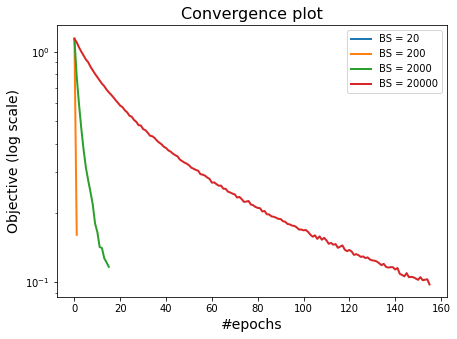

In [ ]:
# In terms of objective value (logarithmic scale)
plt.figure(figsize=(7, 5))
plt.semilogy(D_20_val, label="BS = 20", lw=2)
plt.semilogy(D_200_val, label="BS = 200", lw=2)
plt.semilogy(D_2000_val, label="BS = 2000", lw=2)
plt.semilogy(D_20000, label="BS = 20000", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

### Question 2.2   Different stepsize choices

Fix sample sizes for the gradient and Hessian. We consider two possible stepsize
choices.

In [ ]:
#batch_size = 200 
L = np.linalg.norm(np.matmul(X.T, X))/X.shape[0] + 0.5
sol , D = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="constant", a=0.01/L, lam=0.5)
sol2 , D2 = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="Stoch_lipchitz", a=0.01, lam=0.5)
sol3 , D3 = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="constant", a=0.05/L, lam=0.5)
sol4 , D4 = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="Stoch_lipchitz", a=0.05, lam=0.5)
sol5 , D5 = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="constant", a=0.1/L, lam=0.5)
sol6 , D6 = stoch_new(func_f, w_0_1, w_true, 0.1,  200, 200, X,y, method="Stoch_lipchitz", a=0.1, lam=0.5)

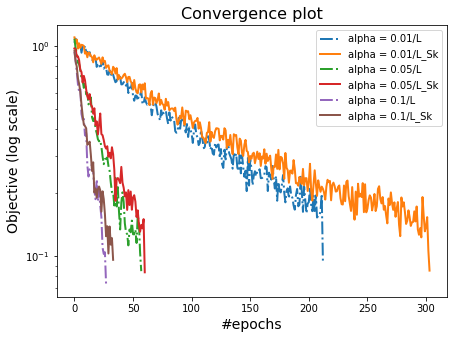

In [ ]:
plt.figure(figsize=(7, 5))
plt.semilogy(D, label="alpha = 0.01/L", lw=2, linestyle='dashdot')
plt.semilogy(D2, label="alpha = 0.01/L_Sk", lw=2)
plt.semilogy(D3, label="alpha = 0.05/L", lw=2, linestyle='dashdot')
plt.semilogy(D4, label="alpha = 0.05/L_Sk", lw=2)
plt.semilogy(D5, label="alpha = 0.1/L", lw=2, linestyle='dashdot')
plt.semilogy(D6, label="alpha = 0.1/L_Sk", lw=2)
plt.title("Convergence plot", fontsize=16)
plt.xlabel("#epochs", fontsize=14)
plt.ylabel("Objective (log scale)", fontsize=14)
plt.legend()

## 2.2 Stochastic quasi-Newton methods

### Implementation 2.2

In [ ]:
def BFGS_ite_stoch(f, grad, H, w_k, c, teta, lam, X,y, Index_grad):

    s = np.dot(H, grad)
    s = s.reshape((s.shape[0],))

    alpha = get_alpha_Armijo_stoch(teta, f, w_k, c, -s, lam, X,y, Index_grad)

    w = w_k -  alpha*s
    s_k = w - w_k
    v_k = f.stoch_grad(lam, w, Index_grad, X,y) - grad
    
    if np.dot(s_k, v_k)>0:
      v_k = v_k.reshape((w.shape[0],1))
      s_k = s_k.reshape((1,w.shape[0]))
      l = np.eye(grad.shape[0])- (np.matmul(v_k,s_k))/np.dot(s_k, v_k)[0,0]
      H = l.T @ H @ l + (s_k.T @ s_k)/np.dot(s_k, v_k)[0,0]
    return w, H


def BFGS_stoch(fonc, w_0, w_star, eps, CardS, X,y, c, teta, lam):
    
    w_k = w_0
    val = fonc()
    grad = 1  
    D = []
    H = np.eye(w_0.shape[0])
    while (grad > eps):
      Index_grad = np.random.randint(0, len(y), CardS)
      w_k, H = BFGS_ite_stoch(val, val.stoch_grad(lam, w_k, Index_grad, X,y), H ,w_k ,c ,teta, lam, X,y, Index_grad)
      delta = np.linalg.norm(w_k - w_star)
      grad = np.linalg.norm(val.stoch_grad(lam, w_k, Index_grad, X,y))
      D.append(grad)
    return w_k, D

### Question 2.3

In [ ]:
w_true = np.array([1.0, 1.2])
X,y = simu_linmodel(w_true, 2000, std=1., corr=0.5)
y = np.sign(y)

w_0_origin = np.zeros(2)
w_0_1 = np.array([-1.2,1])
w_0_2 = np.array([0, 1/200 + 10e-12])


In [ ]:
sol_1 , D_1 = BFGS_stoch(func_f, w_0_1, w_true, 0.1,  1, X,y, c = 0.001, teta = 0.5, lam=0.1) 
sol_20 , D_20 = BFGS_stoch(func_f, w_0_1, w_true, 0.1, 50, X,y, c = 0.001, teta = 0.5, lam=0.1)
D_20_val = [D_20[i] for i in np.arange(0, len(D_20), 1000)]
sol_200 , D_200 = BFGS_stoch(func_f, w_0_1, w_true, 0.1,  500, X,y, c = 0.001, teta = 0.5, lam=0.1)
D_200_val = [D_200[i] for i in np.arange(0, len(D_200), 100)]
sol_2000 , D_2000 = BFGS_stoch(func_f, w_0_1, w_true, 0.1,  5000, X,y, c = 0.001, teta = 0.5, lam=0.1)
D_2000_val = [D_2000[i] for i in np.arange(0, len(D_2000), 10)]
sol_20000 , D_20000= BFGS_stoch(func_f, w_0_1, w_true, 0.1, 20000, X,y, c = 0.001, teta = 0.5, lam=0.1)

It doesn't converge with a batch of 1.

# Binary classification on real world data

## 3.1 Dataset

In [ ]:
from sklearn.datasets import load_svmlight_file


In [ ]:
!wget -c https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a

--2022-02-27 23:00:56--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
X, y = load_svmlight_file("./a9a")
X = X.A
X.shape

(32561, 123)

### 3.2 Optimization problem

In [ ]:
def gi(w, y_point, x_point):
    a = y_point -  1 / (1+np.exp(- x_point.T @ w)).squeeze()
    print(a, type(a))
    return a**2

def grad_gi(w, x_point, y_point):
    num =  -2*np.exp(x_point.T @ w)*( np.exp(x_point.T @ w)*(y_point - 1) + y_point)
    den = (1 + np.exp(x_point.T @ w))**3
    return np.divide( num, den )*x_point

def grad2_gi(w, x_point, y_point):
    num = 2*np.exp(x_point.T @ w)*(np.exp(2*x_point.T @ w) * (y_point - 1) + 2*np.exp(x_point.T @ w) - y_point)
    den = (1 + np.exp(x_point.T @ w))**4
    print("num shape", num.shape)
    print("den shape", den.shape)
    return np.divide(num, den)*(x_point.reshape(x_point.shape[0], 1) @ x_point.reshape(x_point.shape[0], 1).T)

In [ ]:
ws = stoch_new(f, np.zeros(123), w_true, 0.1,  200, 200, X,y, method="Stoch_lipchitz", a=0.01, lam=0.5)
(np.ones((123,1)), gi, grad_gi, grad2_gi, X, y, 5, 5, 5)

ValueError: ignored

## 3.3 COmparison of the algorithm

In [ ]:
def subsampling_newton(w0, f, grad_f, grad2_f, X, y, card_sk, card_skh, alpha_k="armijo", n_iter=10000, thresh=1e-8, verbose=True):
    
    ws = [w0]
    for k in range(n_iter):
        if verbose:
            print(f"Iteration {k}")

        # Choose random sampling points
        batch = np.random.choice(np.arange(X.shape[0]), card_sk, replace=False)

        # Compute subsampling derivative
        gradient = batch_function(batch, grad_f, X, y, ws[k])
        subsampling_gradient = (1/card_sk) * gradient


        # Compute subsampling hessian
        hessian = batch_function(batch, grad2_f, X, y, ws[k])
        subsampling_hessian = (1/card_skh) * hessian

        # Compute search direction dk
        d_k = -1.* ( np.linalg.pinv(subsampling_hessian) @ subsampling_gradient )

        # Compute step size alphak
        if alpha_k == "armijo":
            alpha_k = subsampling_armijo_line_search(batch, f, grad_f, X, y, ws[k], d_k)
            print("alpha_k est ici", alpha_k)
        else:
            alpha_k = alpha_k
        # Compute w(k+1)
        w_next = ws[k].squeeze() + alpha_k*d_k
        
        if np.linalg.norm(w_next - ws[k]) < thresh:  # Convergence test
            if verbose:
                print(f"Limited-memory BFGS has converged after {k} iteration(s)")
            return ws
        ws.append(w_next)
    return ws


In [ ]:
# Stochastic gradient implementation from TP03
def stoch_grad(w0,problem,wtarget,stepchoice=0,step0=1, n_iter=1000,nb=1,average=0,with_replace=False,verbose=False): 
    """
        A code for gradient descent with various step choices.
        
        Inputs:
            w0: Initial vector
            problem: Problem structure
                problem.fun() returns the objective function, which is assumed to be a finite sum of functions
                problem.n returns the number of components in the finite sum
                problem.grad_i() returns the gradient of a single component f_i
                problem.lipgrad() returns the Lipschitz constant for the gradient
                problem.cvxval() returns the strong convexity constant
                problem.lambda returns the value of the regularization parameter
            wtarget: Target minimum (unknown in practice!)
            stepchoice: Strategy for computing the stepsize 
                0: Constant step size equal to 1/L
                t>0: Step size decreasing in 1/(k+1)**t
            step0: Initial steplength (only used when stepchoice is not 0)
            n_iter: Number of iterations, used as stopping criterion
            nb: Number of components drawn per iteration/Batch size 
                1: Classical stochastic gradient algorithm (default value)
            average: Indicates whether the method computes the average of the iterates 
                0: No averaging (default)
                1: With averaging
            with_replace: Boolean indicating whether components are drawn with or without replacement
                True: Components drawn with replacement
                False: Components drawn without replacement (Default)
            verbose: Boolean indicating whether information should be plot at every iteration (Default: False)
            
        Outputs:
            w_output: Final iterate of the method (or average if average=1)
            objvals: History of function values (Numpy array of length n_iter at most)
            normits: History of distances between iterates and optimum (Numpy array of length n_iter at most)
    """
    ############
    # Initial step: Compute and plot some initial quantities

    # objective history
    objvals = []
    
    # iterates distance to the minimum history
    normits = []
    
    # Lipschitz constant
    L = problem.lipgrad()
    
    # Number of samples
    n = problem.n
    
    # Initial value of current iterate  
    w = w0.copy()
    nw = norm(w)
    
    # Average (if needed)
    if average:
            wavg=np.zeros(len(w))

    # Initialize iteration counter
    k=0
    
    # Current objective
    obj = problem.fun(w) 
    objvals.append(obj);
    # Current distance to the optimum
    nmin = norm(w-wtarget)
    normits.append(nmin)
    
    if verbose:
        # Plot initial quantities of interest
        print("Stochastic Gradient, batch size=",nb,"/",n)
        print(' | '.join([name.center(8) for name in ["iter", "fval", "normit"]]))
        print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))
    
    ################
    # Main loop
    while (k < n_iter and nw < 10**100):
        # Draw the batch indices
        ik = np.random.choice(n,nb,replace=with_replace)# Batch gradient
        # Stochastic gradient calculation
        sg = np.zeros(d)
        for j in range(nb):
            gi = problem.grad_i(ik[j],w)
            sg = sg + gi
        sg = (1/nb)*sg
            
        if stepchoice==0:
            w[:] = w - (step0/L) * sg
        elif stepchoice>0:
            sk = float(step0/((k+1)**stepchoice))
            w[:] = w - sk * sg
        
        nw = norm(w) #Computing the norm to measure divergence 

        if average:
            # If average, compute the average of the iterates
            wavg = k/(k+1) *wavg + w/(k+1) 
            nmin = norm(wavg-wtarget)
            obj = problem.fun(wavg)
        else:
            obj = problem.fun(w)
            nmin = norm(w-wtarget)
        
       
        
        k += 1
        # Plot quantities of interest at the end of every epoch only
        if (k*nb) % n == 0:
            objvals.append(obj)
            normits.append(nmin)
            if verbose:
                print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))       
    
    # End of main loop
    #################
    
    # Plot quantities of interest for the last iterate (if needed)
    if (k*nb) % n > 0:
        objvals.append(obj)
        normits.append(nmin)
        if verbose:
            print(' | '.join([("%d" % k).rjust(8),("%.2e" % obj).rjust(8),("%.2e" % nmin).rjust(8)]))              
    
    # Outputs
    w_output = w.copy()
    
    return w_output, np.array(objvals), np.array(normits)